<a href="https://colab.research.google.com/github/ch3rnoalpha/Sales_predictions---john-paredes/blob/main/Project_1_Final_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#imports needed librarys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
################################################################
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
#imports dataset and sets it to df
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/Data files/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


preprocessing

In [69]:
#shows info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [70]:
#sums up duplicate rows
df.duplicated().sum()

0

In [71]:
#drops na data
df.dropna(inplace = True)

In [72]:
#checks for catagorical data errors
df['Item_Fat_Content'].value_counts() 

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [73]:
# corrects catagorical data errors
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat');
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular');
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat');

In [74]:
#checks for catagorical data errors after fix
df['Item_Fat_Content'].value_counts() 

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [ ]:
#shows info on dataset after error fixes
df.info()

In [76]:
#sets up datat train/test split
X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
#====================================================================================================================================

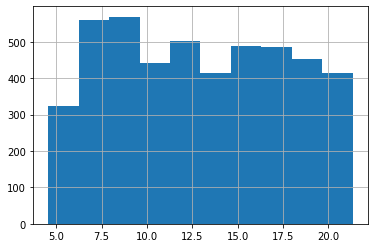

In [77]:
# Histogram of item weights
df['Item_Weight'].hist()
plt.ticklabel_format(useOffset=False, style='plain')

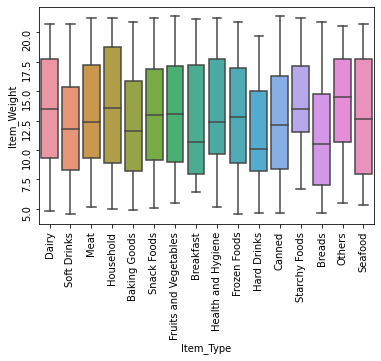

In [78]:
#Boxplot of item type compared to item weight, shows overall averages
ax = sns.boxplot(x='Item_Type', y='Item_Weight', data=df)
ax.tick_params(labelrotation=90)

In [79]:
#creates a correlation chart of all numerical imputs for the df
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.010229,0.033330,-0.010596,0.010972
Item_Visibility,-0.010229,1.000000,-0.007292,0.009324,-0.009644
Item_MRP,0.033330,-0.007292,1.000000,0.004105,0.679594
Outlet_Establishment_Year,-0.010596,0.009324,0.004105,1.000000,-0.040869
Item_Outlet_Sales,0.010972,-0.009644,0.679594,-0.040869,1.000000


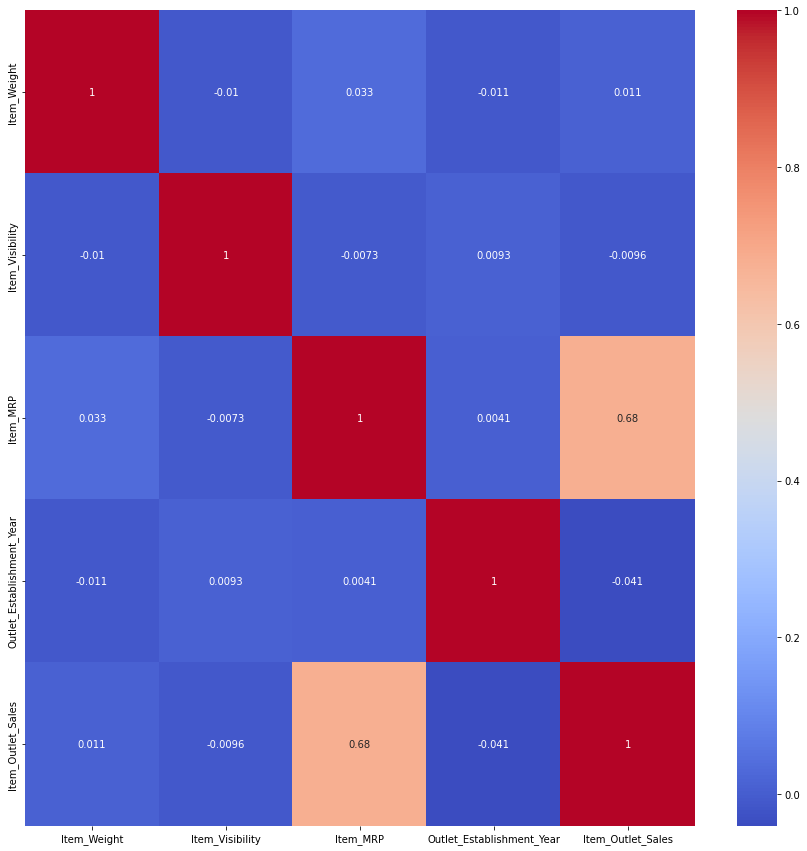

In [80]:
#creates a basic heatmap comparing numerical datapoints, looks for correlations
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm', annot=True)

Item MRP seems to have a stronger effect on outlet sales than other factors.

In [81]:
#creates a mean index of outlet year established
line_df = df.groupby('Outlet_Establishment_Year').mean()
line_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,,
1987,13.006148,0.059957,141.425982,2298.995256
1997,12.866801,0.060464,142.057387,2277.844267
1999,12.917446,0.060806,140.297699,2348.354635
2004,12.829349,0.061263,143.122481,2438.841866
2009,12.873346,0.061014,141.678634,1995.498739


Text(0.5, 1.0, 'Sales compared to Outlet established year')

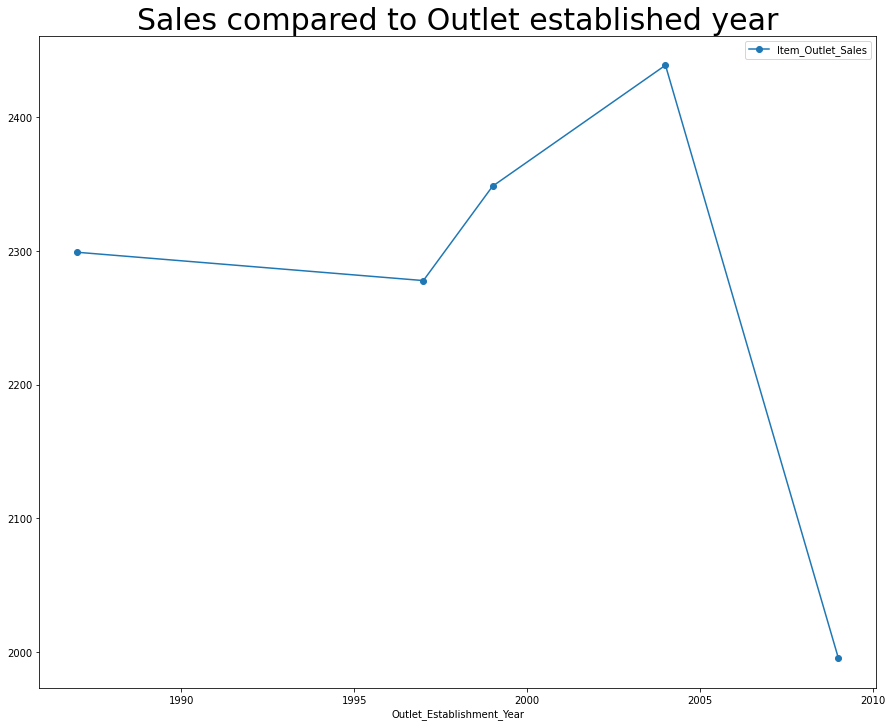

In [82]:
#Plots item sales vs outlet year established
line_df.plot(y=['Item_Outlet_Sales'], subplots=True, marker='o', figsize=(15,12));
plt.title('Sales compared to Outlet established year', fontsize=30)

After 2004~, outlet sales seemed to have dropped off, withoutr any clear indication as to why.

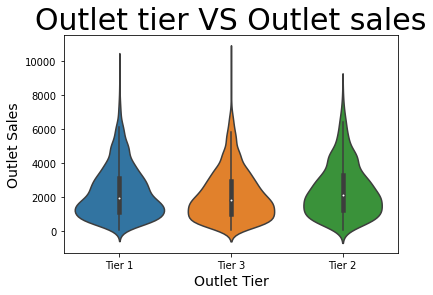

In [83]:
#creates violin boxplot to show outlet tier vs sales
boxplot = sns.violinplot(data=df, x='Outlet_Location_Type',y='Item_Outlet_Sales')


boxplot.axes.set_title("Outlet tier VS Outlet sales", fontsize=30)
boxplot.set_ylabel("Outlet Sales", fontsize=14)
boxplot.set_xlabel("Outlet Tier", fontsize=14);

In [84]:
#column_selectors to tell the column transformers which columns to apply which preprocessing to
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

#imputers, pipelines and tuples
freq_impute = SimpleImputer(strategy = 'most_frequent')
con_impute = SimpleImputer(strategy = 'constant', fill_value= 'Missing')

#instantiating OneHotEncoder & StandardScaler
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
scaler = StandardScaler()

num_pipe = make_pipeline(freq_impute, scaler)
cat_pipe = make_pipeline(con_impute, ohe)

num_tuple = (num_pipe,num_selector)
cat_tuple = (cat_pipe,cat_selector)

#column transformer
transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f98883210>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f98883990>)])

There are no longer any missing values and data has been converted to floats.

This week, you will finalize your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

1) Your first task is to build a linear regression model to predict sales.

* Build a linear regression model.
* Evaluate the performance of your model based on r^2.
* Evaluate the performance of your model based on rmse.

In [85]:
#Reference: code along solutions for challenge regression metrics
def eval_model(true, pred):
  
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

In [ ]:
##############################################################################################################################################################################################

# start of Liner regression

In [86]:
#sets models
dummy = DummyRegressor()
lin = LinearRegression()

In [87]:
#creates base regression pipeline
base_pipe = make_pipeline(transformer, dummy)
base_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f98883210>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f98883990>)])),
                ('dummyregressor', DummyRegressor())])

In [88]:
#prints scores of base model prediction
print('Train Evaluation')
eval_model(y_train, base_pipe.predict(X_train))

print('\nTest Evaluation')
eval_model(y_test, base_pipe.predict(X_test))

Train Evaluation
MAE 1194.959505418405,
 MSE 2250745.792931671,
 RMSE: 1500.2485770470407,
 R^2: 0.0 

Test Evaluation
MAE 1196.67851223271,
 MSE 2221487.683868447,
 RMSE: 1490.4655929837652,
 R^2: -8.864434349242778e-05 


In [89]:
# sets up regression model
lin_reg_pipe = make_pipeline(transformer, lin)
lin_reg_pipe.fit(X_train, y_train);

In [90]:
#prints scores of regression model prediction

print('Train Evaluation')
eval_model(y_train, lin_reg_pipe.predict(X_train))

print('\nTest Evaluation')
eval_model(y_test, lin_reg_pipe.predict(X_test))

Train Evaluation
MAE 808.1069107720429,
 MSE 1197351.816086028,
 RMSE: 1094.235722358774,
 R^2: 0.4680199692714131 

Test Evaluation
MAE 786.2454886559858,
 MSE 1145234.1591255087,
 RMSE: 1070.1561377320174,
 R^2: 0.48442852689544125 


2) Your second task is to build a regression tree model to predict sales.

* Build a simple regression tree model.
* Compare the performance of your model based on r^2.
* Compare the performance of your model based on rmse.  

In [91]:
#creates decision tree pipeline and fits to transformed data
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree_pipe = make_pipeline(transformer, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f98883210>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9f98883990>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [92]:
#prints scores of regression model prediction

print('Train Evaluation')
eval_model(y_train, dec_tree_pipe.predict(X_train))

print('\nTest Evaluation')
eval_model(y_test, dec_tree_pipe.predict(X_test))

Train Evaluation
MAE 0.0,
 MSE 0.0,
 RMSE: 0.0,
 R^2: 1.0 

Test Evaluation
MAE 1181.2070579535684,
 MSE 2705864.4254397033,
 RMSE: 1644.9511924187,
 R^2: -0.21814957817048497 


3) You now have tried 2 different models on your data set. You need to determine which model to implement.

* Overall, which model do you recommend?
* Justify your recommendation.

In [ ]:
#Final conclusion VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV

The decision tree model seemed to have issue with the datata set, where as the linear regressor didnt have an issue and was able to perfrom much better than it, although still not great

If i were to redo this, i would go deeper into the dataset and figure out why exactly the models are not liking the data, there could be hidden data points that are completly throwing the models off, and i was unable to find them my first time going through.